# Single Layer Perceptron
## Definition 
The Perceptron is a binary classification task-based linear machine learning method. 
The stochastic gradient descent optimization approach may be used to quickly develop a linear separation in feature space for two-class classification tasks.

## Framework
* Input value: The perceptron's input layer is made up of artificial input neurons that feed data into the system for further processing. 
* Bias and Weights: The size or strength of the relationship between units is represented by the weight. If the weight from node 1 to node 2 is greater, neuron 1 has a greater impact on the neuron. 
* Net sum: It computess the total sum.
* Activation Function: An activation function determines whether or not a neuron is active. To get the outcome, the activation function generates a weighted sum and then adds bias to it.
![](https://www.researchgate.net/profile/Pradeep-Singh-32/publication/283339701/figure/fig2/AS:421642309509122@1477538768781/Single-Layer-Perceptron-Network-Multilayer-Perceptron-Network-These-type-of-feed-forward.png)

## Algorithm
One of the primary assumptions of this algorithm is that the data must be linearly separable, meaning that a linear classifier must exist that can separate the data with zero training error.
* The weighted sum of the input of the model is called the activation.

$$\text{Activation = Weights} \times \text{Inputs + Bias}$$
* If the activation is above zero, the output will be 1; otherwise, the output will be -1.
$$\hat y^i = \text{sign }(w^T\bar X^i) = 
\begin{cases}
1  & \text{if } w^T\bar X^i > 0\\
-1 & \text{if } w^T\bar X^i < 0
\end{cases}
$$

* The Gradient Approximation Update Rule
    * If the predicted output matches the expected output, the performance is judged sufficient, and the weights are not changed. 
    
    $$\text{no change}
\begin{cases}
\hat y_i = 1  &  y_i = 1\\
\hat y_i = -1  &  y_i = -1
\end{cases}
    $$

    * If the output does not match what was expected, the weights must be adjusted to lower the mistake.
    
    $$ w_{n+1} = w_n - \alpha [(\hat y^i-y_i) \bar x_i]$$


* The decision boundary in the feature space that divides two classes using a line (called a hyperplane).

\begin{aligned}
0 &=w_0x_1+w_1x_2+w_2\\
-w_1x_2 &=w_0x_1+w_2\\
x_2 &=\frac{w_0x_1+w_2}{-w_1}
\end{aligned}

## Deficiencies
* One of the algorithm's primary flaws is its underlying assumption that the data must be linearly separable. The procedure will never converge if the data is not linearly separable, and the hyperplane will continue to move indefinitely. 
* The quality of the hyperplane and converges to the first one it finds is ignored by this approach. As a result, the chance to create a superior hyperplane that would provide improved accuracy with new test data has been missed.

## Data: Banknote Dataset
The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

* Variance of Wavelet Transformed image (continuous).
* Skewness of Wavelet Transformed image (continuous).
* Kurtosis of Wavelet Transformed image (continuous).
* Entropy of image (continuous).
* Class (0 for authentic, 1 for inauthentic).


## Package 
I will use the following packages in this project:
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [numpy](https://numpy.org)
* [pandas](https://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org)
* [sklearn](https://scikit-learn.org/stable/)

## Part One: Fitting a SLP model with in class code
Firstly, I will fit a SLP model with in class code to the dataset with first two input features.

In [201]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [202]:
bank = pd.read_csv('BankNote_Authentication.csv')
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


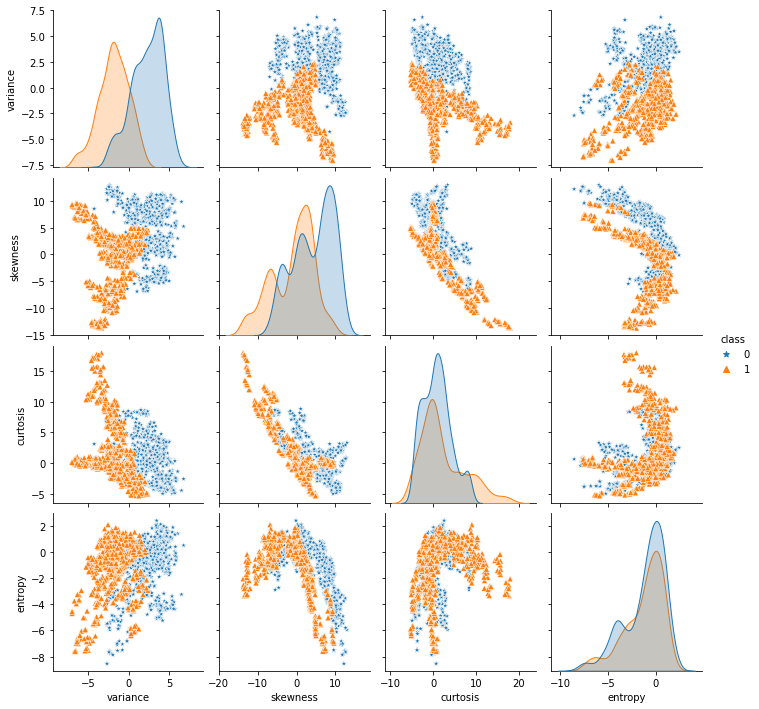

In [203]:
sns.pairplot(bank, hue="class", markers=["*", "^"])

In [205]:
X = bank[['variance','skewness']].to_numpy()
y = bank['class'].to_numpy()
y

array([0, 0, 0, ..., 1, 1, 1])

In [206]:
for i, label in enumerate(y):
    if label == 0:
        y[i] = 1.0
    elif label == 1:
        y[i] = -1.0 

In [207]:
y

array([ 1,  1,  1, ..., -1, -1, -1])

In [208]:
X_bar=[]
for x in X:
    X_bar.append(np.append(x, np.ones(1)))
X_bar=np.array(X_bar)
X_bar.shape

(1372, 3)

Text(0.5, 1.0, 'Banknote Dataset Plot')

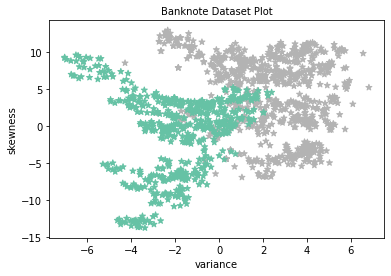

In [209]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, marker = "*",cmap='Set2')  

plt.ylabel('skewness')
plt.xlabel('variance')
plt.title("Banknote Dataset Plot",fontsize=10)

In [210]:
# Define activation function, the sign function
def sign (x,y):
    # the input vector here should be numpy arrays
    if x @ y >0:
        return 1.0
    else:
        return -1.0

### Calculate Loss

The loss function we use is:
$$ L = \frac{1}{2}\sum_{i=1}^n(\hat y_i - y_i)^2$$
 


In [189]:
# Define the loss function
def L(w,features=X_bar,labels=y):
    return sum(.5*(sign(w,x)-labels[i])**2 for i, x in enumerate(features))

In [211]:
# Define the Gradient Approximation Update Rule¶
def grad_approx(w,x,y):
    return(sign(w,x)-y)*x

In [212]:
# set epochs
epochs=1000

# set alpha
alpha=0.5

# random initial weights
w=np.random.rand(3)
print(f"The loss before implementing stochastic approx gradient descent = {L(w)}")

The loss before implementing stochastic approx gradient descent = 832.0


In [213]:
#initial weights and bias
w

array([0.11525344, 0.16382886, 0.21906051])

In [214]:
# Loss array
losses = []

for _ in range(epochs):
    for _ in range(70):
        random_index = np.random.randint(len(y))
        w = w - alpha*grad_approx(w, X_bar[random_index],y[random_index])
    losses.append(L(w))

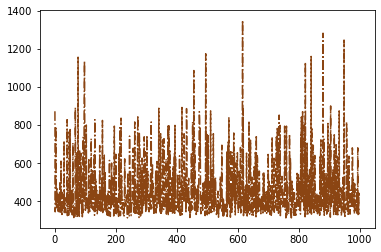

In [215]:
plt.plot(losses, linestyle = '-.', color = "saddlebrown")

### Visualization of decision boundary
Because it employs a line to identify the class of an input, a perceptron is more particularly a linear classification method. We call that line a **decision boundary** if we draw it on a plot. 
For in class example, we are only interested in drawing a decision boundary in 2-D space, which means our input vector must be 2-dimensional as well, and each input may be represented as a point on a graph.

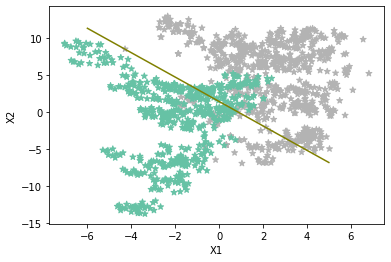

In [216]:
domain = np.arange(-6,6,1)
line = [(w[0]*x + w[2])/-w[1] for x in domain]
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, marker = "*",cmap='Set2')  

plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(domain,line, color = 'olive')

## Part Two: Fitting a SLP with scikit-learn 
I will fit a SLP model with scikit-learn using all features of the data

In [223]:
bank = pd.read_csv('BankNote_Authentication.csv')
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [224]:
X = bank.drop("class", axis=1).to_numpy()
y = bank['class'].to_numpy()

In [225]:
for i, label in enumerate(y):
    if label == 0:
        y[i] = 1.0
    elif label == 1:
        y[i] = -1.0 

In [226]:
y

array([ 1,  1,  1, ..., -1, -1, -1])

In [227]:
X_bar=[]
for x in X:
    X_bar.append(np.append(x, np.ones(1)))
X_bar=np.array(X_bar)
X_bar

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   1.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   1.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   1.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [228]:
# Splitting the data into train and test sections.
# Using 1% of the samples as test data in this section.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X_bar, y, test_size=0.1, random_state=123)

### Evaluate a perceptron model via a mean accuracy score
I will use [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html), [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), and [RepeatedStratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) to evaluate the performance of a perceptron model.

In [229]:
from numpy import mean
from numpy import std
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [230]:
model = Perceptron()
# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate the model without defined parameters
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.979 (0.016)


For the model without any defined parameters, the mean accuracy score is 0.753. 

### Tune Perceptron Hyperparameters
Then, I try to find the optimal lerning rate and max_iter for the training dataset through the function GridSearchCV( ) in sklearn.model_selection.

In [215]:
model = Perceptron()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['max_iter'] = [15, 50, 100, 1000, 10000]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.764
Config: {'eta0': 1.0, 'max_iter': 15}


The automaticlly chosen *eta0* and *max_iter* parameters are 1.0 and 15 respectively, which improves the mean accuracy score from 0.755 to 0.764.

### Model Comparison
With the test data, I will make comparison between the perceptron model without defined hyperparameters and the model with automaticlly chosen hyperparameters by calculating their squared error. 

In [192]:
model_default = Perceptron()
model_optimal = Perceptron(eta0=0.0001, max_iter=10)
model_default.fit(X_train, y_train)
model_optimal.fit(X_train, y_train)
yhat_default = model_default.predict(X_test)
yhat_optimal = model_optimal.predict(X_test)

In [232]:
def Loss(y_test, y_hat):
    return sum(.5*(y_hat-y_test)**2)

In [233]:
Loss(y_test, yhat_default) 

20.0

In [234]:
Loss(y_test, yhat_optimal)  

14.0

Compared to the model with default hyperparameters, the model using optimal hyperparameters has smaller loss, which means that its prediction is more accurate.

## Reference
Baser, A. (2020, May 21). The Perceptron Algorithm for Binary Classification | By Aditya Baser | Analytics Vidhya | Medium. Medium. https://medium.com/analytics-vidhya/the-perceptron-algorithm-for-binary-classification-ab65aaf237d7.

